# Adoção de IA Generativa: Fato, Moda ou Pressão Corporativa?
 **As empresas realmente priorizam a IA Generativa ou estão apenas seguindo uma tendência sem estrutura nem convicção?**

Por Rafael Figueiredo

Nos últimos anos, a Inteligência Artificial Generativa — especialmente com o avanço dos Large Language Models (LLMs) — tem dominado o discurso corporativo sobre inovação, produtividade e transformação digital. Porém, diante de tanta visibilidade e "hype" em torno do tema, surge uma dúvida legítima: estamos vivendo uma verdadeira revolução tecnológica ou apenas respondendo a uma pressão de mercado para parecer inovador?

Com base na pesquisa **State of Data Brazil 2024-2025 [Data Hackers + Bain]** - com profissionais da área de dados e tecnologia, esta análise busca entender como a IA Generativa está, de fato, sendo adotada nas empresas brasileiras:

- É uma prioridade estratégica nas empresas?

- Está estruturada ou sendo aplicada de forma descentralizada e desorganizada?

- Há retorno percebido ou apenas promessas?

- Quais são os principais motivos para a não adoção?

- Qual o impacto no mercado de trabalho? Como isso impactou a entrada de perfis mais juniores no mercado?

Ao examinar dados como o grau de priorização da IA Generativa nas empresas, os tipos de uso implementados, o perfil dos profissionais que a utilizam e as barreiras enfrentadas para adoção, esta análise pretende responder:

A IA Generativa está se consolidando como um diferencial competitivo ou permanece apenas como um símbolo de modernidade corporativa, adotado por pressão e modismo?


In [1]:
!pip install -q adjustText

In [2]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'kaggle'

# Define a paleta de cores padrão para gráficos com categorias
px.defaults.color_discrete_sequence = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
    "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"
]

# Removendo os warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Importando as bases de dados de anos anteriores
df_2021 = pd.read_csv('/kaggle/input/state-of-data-2021/State of Data 2021 - Dataset - Pgina1.csv')
df_2022 = pd.read_csv('/kaggle/input/state-of-data-2022/State_of_data_2022.csv')
df_2023 = pd.read_csv('/kaggle/input/state-of-data-brazil-2023/State_of_data_BR_2023_Kaggle - df_survey_2023.csv')

# Importanto a base de dados do ano atual
df = pd.read_csv('/kaggle/input/state-of-data-brazil-20242025/Final Dataset - State of Data 2024 - Kaggle - df_survey_2024.csv')

# Criando uma coluna para representar o ano da pesquisa
df_2021["ano_base"] = '2021'
df_2022["ano_base"] = '2022'
df_2023["ano_base"] = '2023'
df["ano_base"] = '2024'

# Colunas de cada ano com nome simplificados e unificados
colunas_2021_simplificadas = pd.read_csv('/kaggle/input/colunas-simplificadas/colunas_2021_simplificadas.csv', header=None)[0].tolist()
colunas_2022_simplificadas = pd.read_csv('/kaggle/input/colunas-simplificadas/colunas_2022_simplificadas.csv', header=None)[0].tolist()
colunas_2023_simplificadas = pd.read_csv('/kaggle/input/colunas-simplificadas/colunas_2023_simplificadas.csv', header=None)[0].tolist()
colunas_2024_simplificadas = pd.read_csv('/kaggle/input/colunas-simplificadas/colunas_2024_simplificadas.csv', header=None)[0].tolist()

# Renomeando colunas usando as listas padronizadas
df_2021.columns = colunas_2021_simplificadas
df_2022.columns = colunas_2022_simplificadas
df_2023.columns = colunas_2023_simplificadas
df.columns = colunas_2024_simplificadas

# Fazendo o sanity da base de dados - Removendo duplicatas
df_2021.drop_duplicates(subset = ['id'], inplace = True)
df_2022.drop_duplicates(subset = ['id'], inplace = True)
df_2023.drop_duplicates(subset = ['id'], inplace = True)
df.drop_duplicates(subset = ['id'], inplace = True)

#Juntar as bases de dados em data frame
data_completo = pd.concat([df_2021 ,df_2022, df_2023, df], ignore_index=True)

In [4]:
# Criando nova categorização de setor
setores_new = {
    "Finanças ou Bancos": "Financeiro e Seguros",
    "Seguros ou Previdência": "Financeiro e Seguros",
    "Tecnologia/Fábrica de Software": "Tecnologia e Internet",
    "Internet/Ecommerce": "Tecnologia e Internet",
    "Varejo": "Comércio e Varejo",
    "Marketing": "Comércio e Varejo",
    "Área de Consultoria": "Consultoria e Serviços",
    "Filantropia/ONG's": "Consultoria e Serviços",
    "Indústria": "Indústrias e Manufatura",
    "Setor Automotivo": "Indústrias e Manufatura",
    "Setor Farmacêutico": "Indústrias e Manufatura",
    "Setor de Energia": "Indústrias e Manufatura",
    "Área da Saúde": "Saúde e Educação",
    "Educação": "Saúde e Educação",
    "Agronegócios": "Agronegócios e Alimentação",
    "Setor Alimentício": "Agronegócios e Alimentação",
    "Setor Imobiliário/Construção Civil": "Construção e Imobiliário",
    "Telecomunicação": "Comunicação e Entretenimento",
    "Entretenimento ou Esportes": "Comunicação e Entretenimento",
    "Setor Público": "Setor Público"
}

df['setor_novo'] = df['setor'].map(setores_new)

# Colunas de obstáculos
obstaculos_labels = {
    'ia_motivo_nao_usar_falta_compreensao': 'Casos de uso pouco claros',
    'ia_motivo_nao_usar_falta_confiabilidade': 'Alucinações / Confiabilidade',
    'ia_motivo_nao_usar_incerteza_regulamentacao': 'Incertezas regulatórias',
    'ia_motivo_nao_usar_seguranca_privacidade': 'Segurança e privacidade',
    'ia_motivo_nao_usar_roi_nao_comprovado': 'ROI não comprovado',
    'ia_motivo_nao_usar_dados_nao_prontos': 'Dados não prontos',
    'ia_motivo_nao_usar_falta_expertise_recursos': 'Falta de expertise / recursos',
    'ia_motivo_nao_usar_diretoria_nao_ve_valor': 'Alta direção não vê valor',
    'ia_motivo_nao_usar_propriedade_intelectual': 'Propriedade intelectual'
}

obstaculos_cols = list(obstaculos_labels.keys())

# Colunas de uso da IA generativa na empresa
uso_cols = [
    'ia_generativa_uso_independente',
    'ia_generativa_uso_centralizado',
    'ia_generativa_uso_copilots',
    'ia_generativa_melhora_produtos_externos',
    'ia_generativa_melhora_produtos_internos',
    'ia_generativa_principal_frente_negocio',
]

# Colunas de uso da IA generativa (pessoal)
uso_cols_func = [
    'ia_generativa_uso_pessoal_independente',
    'ia_generativa_uso_pessoal_centralizado',
    'ia_generativa_uso_pessoal_copilots',
    'ia_generativa_uso_pessoal_melhora_produtos_externos',
    'ia_generativa_uso_pessoal_melhora_produtos_internos',
    'ia_generativa_uso_pessoal_principal_frente_negocio',
]

# Dicionario uso IA gratuita/paga
uso_ai_labels = {
    'ia_produtividade_nao_uso': 'Não usa IA',
    'ia_produtividade_uso_gratis': 'Usa IA gratuita',
    'ia_produtividade_pago_uso': 'Paga pela IA',
    'ia_produtividade_empresa_paga': 'Empresa paga IA',
}

# Mapeamento dos cargos
mapeamento_categorias = {
    "Analista de Dados/Data Analyst": "Análise de Dados e BI",
    "Analista de BI/BI Analyst": "Análise de Dados e BI",
    
    "Cientista de Dados/Data Scientist": "Ciência de Dados",
    "Engenheiro de Machine Learning/ML Engineer/AI Engineer": "Ciência de Dados",
    "Estatístico": "Ciência de Dados",

    "Engenheiro de Dados/Data Engineer/Data Architect": "Engenharia de Dados",
    "Arquiteto de Dados/Data Architect": "Engenharia de Dados",
}

df['cargo'] = df['cargo_atual'].map(mapeamento_categorias)

# Colunas das barreiras para adocao da IA GEN
colunas_barreiras = ['ia_motivo_nao_usar_falta_compreensao',
 'ia_motivo_nao_usar_falta_confiabilidade',
 'ia_motivo_nao_usar_incerteza_regulamentacao',
 'ia_motivo_nao_usar_seguranca_privacidade',
 'ia_motivo_nao_usar_roi_nao_comprovado',
 'ia_motivo_nao_usar_dados_nao_prontos',
 'ia_motivo_nao_usar_falta_expertise_recursos',
 'ia_motivo_nao_usar_diretoria_nao_ve_valor',
 'ia_motivo_nao_usar_propriedade_intelectual']

# Lista ordenada das faixas salariais
rotulos_salario = {
    "Menos de R$ 1.000/mês": "Até 2k",
    "de R$ 1.001/mês a R$ 2.000/mês": "Até 2k",
    "de R$ 2.001/mês a R$ 3.000/mês": "R$2k–4k",
    "de R$ 3.001/mês a R$ 4.000/mês": "R$2–4k",
    "de R$ 4.001/mês a R$ 6.000/mês": "R$4k–6k",
    "de R$ 6.001/mês a R$ 8.000/mês": "R$6k–8k",
    "de R$ 8.001/mês a R$ 12.000/mês": "R$8k–12k",
    "de R$ 12.001/mês a R$ 16.000/mês": "R$12k–16k",
    "de R$ 16.001/mês a R$ 20.000/mês": "R$16k–25k",
    "de R$ 20.001/mês a R$ 25.000/mês": "R$16k–25k",
    "de R$ 25.001/mês a R$ 30.000/mês": "R$25k–30k",
    "de R$ 30.001/mês a R$ 40.000/mês": "> R$30k",
    "Acima de R$ 40.001/mês": "> R$40k"
}
df['faixa_salarial'] = df['faixa_salarial'].map(rotulos_salario)

ordem_faixas = [
    'Até 2k',
    'R$2–4k',
    'R$4k–6k',
    'R$6k–8k',
    'R$8k–12k',
    'R$12k–16k',
    'R$16k–25k',
    'R$25k–30k',
    '> R$30k'
]

# Transformar a coluna em categórica ordenada
df['faixa_salarial'] = pd.Categorical(df['faixa_salarial'],
                                          categories=ordem_faixas,
                                          ordered=True)

# Colunas tempo Engenheiro de Dados
colunas_de = [
    'tempo_de_desenvolvendo_pipelines',
    'tempo_de_construindo_etl',
    'tempo_de_criando_consultas_sql',
    'tempo_de_integrando_fontes_dados',
    'tempo_de_modelando_arquitetura',
    'tempo_de_mantendo_datalakes',
    'tempo_de_modelando_dw_dm',
    'tempo_de_cuidando_qualidade_dados'
]

nomes_de = {
    'tempo_de_desenvolvendo_pipelines': 'Desenvolvendo pipelines',
    'tempo_de_construindo_etl': 'Construindo ETL',
    'tempo_de_criando_consultas_sql': 'Criando consultas SQL',
    'tempo_de_integrando_fontes_dados': 'Integrando fontes de dados',
    'tempo_de_modelando_arquitetura': 'Modelando arquitetura',
    'tempo_de_mantendo_datalakes': 'Mantendo datalakes',
    'tempo_de_modelando_dw_dm': 'Modelando DW/DM',
    'tempo_de_cuidando_qualidade_dados': 'Cuidando da qualidade dos dados'
}

# Colunas tempo Analista de Dados
colunas_da = [
    'tempo_da_analisando_dados_py_r',
    'tempo_da_construindo_dashboards',
    'tempo_da_criando_consultas_sql',
    'tempo_da_usando_apis',
    'tempo_da_realizando_testes_estatisticos',
    'tempo_da_mantendo_etl',
    'tempo_da_modelando_dw_dm',
    'tempo_da_mantendo_planilhas',
    'tempo_da_usando_ferramentas_estatisticas',
    'tempo_da_nenhuma_opcao'
]

nomes_da = {
    'tempo_da_analisando_dados_py_r': 'Analisando dados (Python/R)',
    'tempo_da_construindo_dashboards': 'Construindo dashboards',
    'tempo_da_criando_consultas_sql': 'Criando consultas SQL',
    'tempo_da_usando_apis': 'Usando APIs',
    'tempo_da_realizando_testes_estatisticos': 'Realizando testes estatísticos',
    'tempo_da_mantendo_etl': 'Mantendo ETL',
    'tempo_da_modelando_dw_dm': 'Modelando DW/DM',
    'tempo_da_mantendo_planilhas': 'Mantendo planilhas',
    'tempo_da_usando_ferramentas_estatisticas': 'Usando ferramentas estatísticas',
    'tempo_da_nenhuma_opcao': 'Nenhuma das opções'
}

# Colunas tempo Cientista de Dados
colunas_ds = [
    'tempo_ds_coleta_limpeza_dados',
    'tempo_ds_contato_area_negocio',
    'tempo_ds_desenvolve_modelos_ml',
    'tempo_ds_coloca_modelos_producao',
    'tempo_ds_mantem_modelos_producao',
    'tempo_ds_constroi_dashboards',
    'tempo_ds_usa_ferramentas_estatisticas',
    'tempo_ds_mantem_etl_dags',
    'tempo_ds_gerencia_feature_store_mlops',
    'tempo_ds_estudos_ad_hoc',
    'tempo_ds_cria_mantem_infra',
    'tempo_ds_treina_aplica_llm'
]

nomes_ds = {
    'tempo_ds_coleta_limpeza_dados': 'Coleta e Limpeza de Dados',
    'tempo_ds_contato_area_negocio': 'Contato com Área de Negócio',
    'tempo_ds_desenvolve_modelos_ml': 'Desenvolvimento de Modelos ML',
    'tempo_ds_coloca_modelos_producao': 'Implantação de Modelos em Produção',
    'tempo_ds_mantem_modelos_producao': 'Manutenção de Modelos em Produção',
    'tempo_ds_constroi_dashboards': 'Construção de Dashboards',
    'tempo_ds_usa_ferramentas_estatisticas': 'Uso de Ferramentas Estatísticas',
    'tempo_ds_mantem_etl_dags': 'Manutenção de Pipelines ETL/DAGs',
    'tempo_ds_gerencia_feature_store_mlops': 'Gestão de Feature Store e MLOps',
    'tempo_ds_estudos_ad_hoc': 'Estudos Ad Hoc',
    'tempo_ds_cria_mantem_infra': 'Criação e Manutenção de Infraestrutura',
    'tempo_ds_treina_aplica_llm': 'Treinamento e Aplicação de LLMs'
}

# Mapeamento para nomes mais curtos prioridade
label_map = {
    "Sim, é nossa principal prioridade como empresa (com foco executivo significativo e alocação de orçamento relevante).": "Principal prioridade",
    "Sim, está entre nossas principais prioridades para os próximos 2-4 anos (com discussões de iniciativas e orçamentos de curto a médio prazo).": "Entre prioridades (2-4 anos)",
    "Mais ou menos... É uma das várias iniciativas que estamos impulsionando, mas não é uma prioridade (tratam-se de iniciativas isoladas e com pouco foco).": "Iniciativas isoladas",
    "Não é uma iniciativa que estamos focando e não tem sido uma prioridade.": "Não é foco",
    "Não sei opinar sobre esse assunto.": "Não sei opinar"
}

In [5]:
# Funções utilizadas para criar os gráficos
def plot_tempo_atividades_por_ano(dataframe, colunas, nomes_legiveis, titulo):
    # Calcula a média por ano
    df_medias = dataframe[colunas + ['ano_base']].groupby('ano_base')[colunas].mean()

    # Normaliza cada linha (por ano)
    df_normalizado = df_medias.div(df_medias.sum(axis=1), axis=0)

    # Transforma em formato longo
    df_long = df_normalizado.reset_index().melt(
        id_vars='ano_base',
        var_name='atividade',
        value_name='percentual'
    )

    # Mapeia nomes legíveis
    df_long['atividade_legivel'] = df_long['atividade'].map(nomes_legiveis)

    # Gera o gráfico
    fig = px.bar(
        df_long,
        x='ano_base',
        y='percentual',
        facet_col='atividade_legivel',
        facet_col_wrap=3,
        color='atividade_legivel',
        labels={'ano_base': 'Ano', 'percentual': 'Percentual'},
        height=800
    )

    # Ajustes visuais
    fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
    fig.update_layout(showlegend=False)
    fig.update_layout(title=titulo, title_x=0.5)
    
    fig.show()

def plot_uso_ia_por_grupo(df, grupo, col_uso_ai, titulo, rotulo_eixo_x, legenda_labels=None):
    """
    Gera gráfico de barras empilhadas com o percentual de uso de IA generativa por grupo (ex: faixa salarial, senioridade, cargo)

    Parâmetros:
    - df: DataFrame de entrada
    - grupo: coluna com os grupos (ex: 'faixa_salarial', 'nivel_senioridade', 'cargo')
    - col_uso_ai: lista de colunas binárias que indicam uso de IA
    - titulo: título do gráfico
    - rotulo_eixo_x: rótulo a ser exibido no eixo x
    - legenda_labels: (opcional) dicionário para renomear os valores da legenda
    """
    # Soma os 1s (quantos marcaram cada opção por grupo)
    df_grouped = df.groupby(grupo)[col_uso_ai].sum()

    # Divide cada linha pelo total do grupo para obter proporções
    df_grouped_normalized = df_grouped.div(df_grouped.sum(axis=1), axis=0)
    df_grouped_pct = df_grouped_normalized * 100 

    # Transforma em formato longo (long format)
    df_long = df_grouped_pct.reset_index().melt(
        id_vars=grupo,
        var_name='uso_ai',
        value_name='percentual'
    )

    # Aplica mapeamento para legenda, se fornecido
    if legenda_labels:
        df_long['uso_ai'] = df_long['uso_ai'].map(legenda_labels)

    # Cria gráfico
    fig = px.bar(
        df_long,
        x=grupo,
        y='percentual',
        color='uso_ai',
        text='percentual',
        title=titulo,
        labels={grupo: rotulo_eixo_x, 'percentual': 'Percentual (%)'},
    )

    fig.update_layout(
        barmode='stack',
        xaxis_tickangle=-45,
        legend_title_text='Uso de IA',
        yaxis_title='Percentual (%)',
        yaxis=dict(range=[0, 100]),
    )

    fig.update_traces(texttemplate='%{text:.1f}%', textposition='inside')
    fig.show()


def plot_uso_ia_por_grupo(df, grupo, col_uso_ai, titulo, rotulo_eixo_x, legenda_labels=None):
    """
    Gera gráfico de barras empilhadas com o percentual de uso de IA generativa por grupo (ex: faixa salarial, senioridade, cargo)

    Parâmetros:
    - df: DataFrame de entrada
    - grupo: coluna com os grupos (ex: 'faixa_salarial', 'nivel_senioridade', 'cargo')
    - col_uso_ai: lista de colunas binárias que indicam uso de IA
    - titulo: título do gráfico
    - rotulo_eixo_x: rótulo a ser exibido no eixo x
    - legenda_labels: (opcional) dicionário para renomear os valores da legenda
    """
    # Soma os 1s (quantos marcaram cada opção por grupo)
    df_grouped = df.groupby(grupo)[col_uso_ai].sum()

    # Divide cada linha pelo total do grupo para obter proporções
    df_grouped_normalized = df_grouped.div(df_grouped.sum(axis=1), axis=0)
    df_grouped_pct = df_grouped_normalized * 100 

    # Transforma em formato longo (long format)
    df_long = df_grouped_pct.reset_index().melt(
        id_vars=grupo,
        var_name='uso_ai',
        value_name='percentual'
    )

    # Aplica mapeamento para legenda, se fornecido
    if legenda_labels:
        df_long['uso_ai'] = df_long['uso_ai'].map(legenda_labels)

    # Cria gráfico
    fig = px.bar(
        df_long,
        x=grupo,
        y='percentual',
        color='uso_ai',
        text='percentual',
        title=titulo,
        labels={grupo: rotulo_eixo_x, 'percentual': 'Percentual (%)'},
    )

    fig.update_layout(
        barmode='stack',
        xaxis_tickangle=-45,
        legend_title_text='Uso de IA',
        yaxis_title='Percentual (%)',
        yaxis=dict(range=[0, 100]),
    )

    fig.update_traces(texttemplate='%{text:.1f}%', textposition='inside')
    fig.show()

def criar_radar_chart(valores1, valores2, categorias, titulo, subtitulo, label1, label2, cor1, cor2):
    """
    Cria e exibe um gráfico de radar comparando dois conjuntos de dados.

    Args:
        valores1 (list): Lista de valores para o primeiro conjunto de dados.
        valores2 (list): Lista de valores para o segundo conjunto de dados.
        categorias (list): Lista de rótulos para cada eixo.
        titulo (str): Título principal do gráfico.
        subtitulo (str): Subtítulo do gráfico (aparece abaixo).
        label1 (str): Rótulo para o primeiro conjunto de dados na legenda.
        label2 (str): Rótulo para o segundo conjunto de dados na legenda.
        cor1 (str): Cor para o primeiro conjunto de dados.
        cor2 (str): Cor para o segundo conjunto de dados.
    """
    num_vars = len(categorias)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # Adiciona o primeiro valor no final para fechar o círculo do gráfico
    valores1 = np.concatenate((valores1, [valores1[0]]))
    valores2 = np.concatenate((valores2, [valores2[0]]))
    angles += angles[:1]

    # Criação do plot
    fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))

    ax.plot(angles, valores1, color=cor1, linewidth=2, label=label1)
    ax.fill(angles, valores1, color=cor1, alpha=0.25)

    ax.plot(angles, valores2, color=cor2, linewidth=2, label=label2)
    ax.fill(angles, valores2, color=cor2, alpha=0.25)

    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles[:-1]), categorias)

    ax.set_title(titulo, fontsize=13, pad=20)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

    plt.suptitle(subtitulo, fontsize=13, y=-0.00, color='black')
    plt.tight_layout()
    plt.show()

## 1. A IA Generativa é vista como prioridade pelas empresas e seus gestores?

O gráfico abaixo representa a percepção dos gestores a pesquisa de como eles avaliam a prioridade da IA Generativa nas empresas. Podemos perceber que mais de metade deles (53,6%), consideram que ela é a principal prioridade ou uma das prioridades para os próximos anos, indicando que a maioria está planejando ou esperando implementar a tecnologia num horizonte de curto/médio prazo. Além disso, 14,8% das empresas indicam que a IA Generativa "Não é foco" no momento, sinalizando que ainda existem setores ou organizações que estão céticas ou que não enxergam valor imediato.

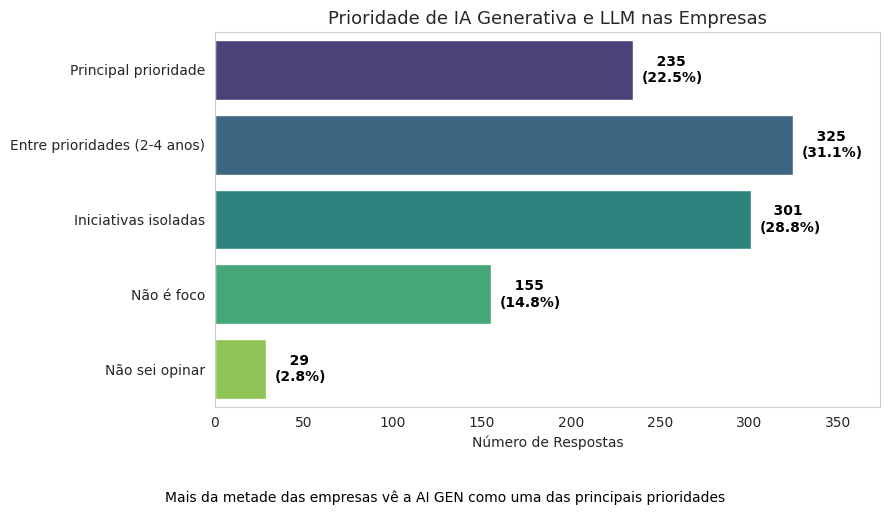

In [6]:
# Reindexando e renomeando
contagem = df['ia_generativa_prioridade_empresa'].value_counts()
contagem = contagem.reindex(label_map.keys())
contagem.index = contagem.index.map(label_map)

# Plot
plt.figure(figsize=(9, 5))
sns.set_style("whitegrid")
palette = sns.color_palette("viridis", len(contagem))

bars = sns.barplot(x=contagem.values, y=contagem.index, palette=palette)

total = contagem.sum()
for i, v in enumerate(contagem.values):
    perc = v / total * 100
    bars.text(v + 5, i, f'   {v} \n({perc:.1f}%)', color='black', va='center', fontweight='bold')

plt.suptitle("Mais da metade das empresas vê a AI GEN como uma das principais prioridades", fontsize=10, y=-0.05, color='black')
plt.grid(False)
# Aplicar ao gráfico
plt.title("Prioridade de IA Generativa e LLM nas Empresas", fontsize=13)
plt.xlabel("Número de Respostas")
plt.ylabel("")
x_max = contagem.max()
plt.xlim(0, x_max * 1.15)
plt.tight_layout()
plt.show()

No gráfico abaixo, vemos como a visão da prioridade mudou de um ano para o outro. A proporção de empresas que veem a IA Generativa como principal prioridade praticamente dobrou de 12,3% para 22,5%, indicando um maior foco das empresas na IA generativa, enquanto a de empresas que viam o tópico como não prioritário, caiu pela metade, sugerindo que menos empresas veem a IA generativa como irrelevante.  
No geral, observamos uma tendência de aumento na percepção da IA generativa como uma prioridade estratégica nas empresas entre 2023 e 2024, com menos incerteza e uma maior definição de seu papel a curto e médio prazo.

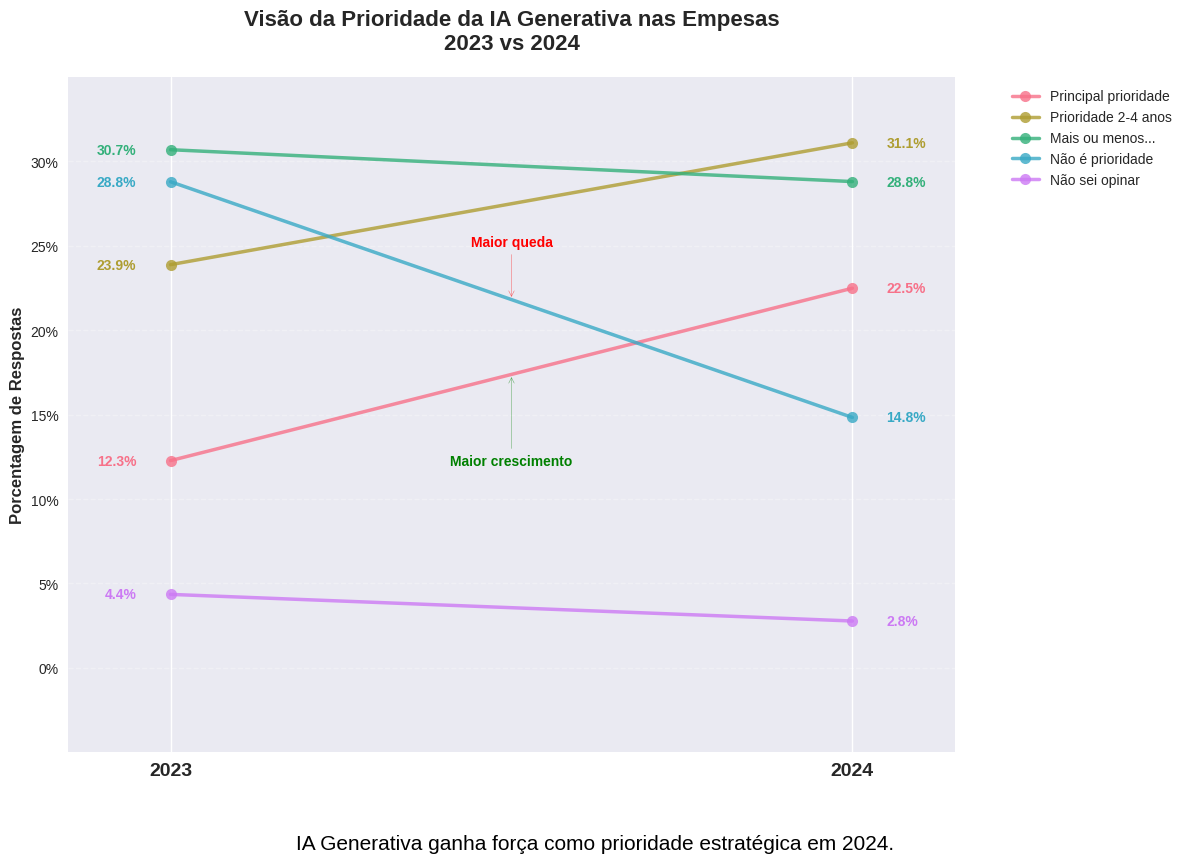

In [7]:
df_all = data_completo.copy()
df_all.dropna(subset=['ia_generativa_prioridade_empresa'],inplace = True)
df_all['ia_generativa_prioridade_empresa'] = df_all['ia_generativa_prioridade_empresa'] = (
    df_all['ia_generativa_prioridade_empresa']
    .str.replace(r'\(.*?\)', '', regex=True)
    .str.strip()
)

# Agora, calcular a proporção por ano
df_pct = (
    df_all
    .groupby(['ia_generativa_prioridade_empresa', 'ano_base'])  # Agrupa por prioridade e ano
    .size()  # Conta ocorrências
    .reset_index(name='contagem')  # Transforma em DataFrame
    .assign(  # Calcula a proporção dentro de cada ano
        proporcao=lambda x: x['contagem'] / x.groupby('ano_base')['contagem'].transform('sum')
    )
    .drop(columns=['contagem'])  # Remove a coluna auxiliar se não for necessária
)

df_teste = df_pct.pivot(index = 'ia_generativa_prioridade_empresa', columns='ano_base', values='proporcao')
df_teste = df_teste.reset_index()
# Criar labels mais curtas para melhor visualização
labels_curtas = [
    'Mais ou menos...',
    'Não sei opinar',
    'Não é prioridade',
    'Prioridade 2-4 anos',
    'Principal prioridade'
]

# Reordenar os dados em ordem lógica (do maior para o menor nível de prioridade)
ordem_logica = [4, 3, 0, 2, 1]  # Principal prioridade, Prioridade 2-4 anos, Mais ou menos, Não é prioridade, Não sei opinar
df_teste = df_teste.iloc[ordem_logica].reset_index(drop=True)
labels_curtas = [labels_curtas[i] for i in ordem_logica]

# Configurar o estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Criar a figura
fig, ax = plt.subplots(figsize=(12, 8))

# Cores para cada linha
colors = sns.color_palette("husl", len(df_teste))

# Plotar as linhas
for i, row in df_teste.iterrows():
    ax.plot([0, 1], [row['2023'], row['2024']], 
            marker='o', markersize=8, linewidth=2.5, 
            color=colors[i], alpha=0.8, label=labels_curtas[i])
    
    # Adicionar valores nas extremidades com formato de porcentagem
    ax.text(-0.05, row['2023'], f'{row["2023"]*100:.1f}%', 
            ha='right', va='center', fontsize=10, color=colors[i], fontweight='bold')
    ax.text(1.05, row['2024'], f'{row["2024"]*100:.1f}%', 
            ha='left', va='center', fontsize=10, color=colors[i], fontweight='bold')

# Configurar os eixos
ax.set_xlim(-0.15, 1.15)
ax.set_ylim(-0.05, 0.35)
ax.set_xticks([0, 1])
ax.set_xticklabels(['2023', '2024'], fontsize=14, fontweight='bold')

# Configurar eixo y com formato de porcentagem
ax.set_yticks(np.arange(0, 0.35, 0.05))
ax.set_yticklabels([f'{int(y*100)}%' for y in np.arange(0, 0.35, 0.05)])

# Configurar o grid
ax.grid(True, axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

# Títulos e labels
ax.set_title('Visão da Prioridade da IA Generativa nas Empesas\n2023 vs 2024', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_ylabel('Porcentagem de Respostas', fontsize=12, fontweight='bold')

# Legenda
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Ajustar layout
plt.tight_layout()

# Adicionar algumas anotações para destacar mudanças significativas
# Encontrar índices das categorias reordenadas
idx_principal_prioridade = labels_curtas.index('Principal prioridade')
idx_nao_prioridade = labels_curtas.index('Não é prioridade')

# Maior aumento: "Principal Prioridade"
ax.annotate('Maior crescimento', 
            xy=(0.5, (df_teste.loc[idx_principal_prioridade, '2023'] + df_teste.loc[idx_principal_prioridade, '2024'])/2), 
            xytext=(0.5, 0.12),
            arrowprops=dict(arrowstyle='->', color='green', alpha=0.7),
            fontsize=10, ha='center', color='green', fontweight='bold')

# Maior diminuição: "Não é prioridade"
ax.annotate('Maior queda', 
            xy=(0.5, (df_teste.loc[idx_nao_prioridade, '2023'] + df_teste.loc[idx_nao_prioridade, '2024'])/2), 
            xytext=(0.5, 0.25),
            arrowprops=dict(arrowstyle='->', color='red', alpha=0.7),
            fontsize=10, ha='center', color='red', fontweight='bold')


plt.suptitle("IA Generativa ganha força como prioridade estratégica em 2024.", fontsize=15, y=-0.05, color='black')


plt.show()

Esses resultados dialogam fortemente com os achados da *Bain Generative AI Survey*. Segundo o levantamento com executivos de empresas dos EUA e Europa, realizado em julho de 2024, apenas 9% dos respondentes apontaram a IA Generativa como a principal prioridade atual em suas organizações. Em contraste, no contexto brasileiro, essa percepção é mais elevada, alcançando 22,5% das empresas.

No entanto, o cenário se inverte quando observamos o horizonte de médio prazo: enquanto 88% das empresas afirmam que a IA Generativa será uma das principais prioridades dentro de até quatro anos, no Brasil esse número é significativamente menor, com apenas 53,6% das empresas demonstrando esse nível de compromisso futuro.  

Uma possível explicação para essas diferenças envolve: 
- Adoção impulsiva no Brasil: O maior percentual atual de empresas brasileiras que já veem a IA como prioridade pode indicar uma adoção mais reativa ou orientada por modismos, sem necessariamente refletir uma estratégia sólida de longo prazo.
- Diferença de maturidade digital: A disparidade nos planejamentos de médio prazo pode revelar um gap de maturidade digital entre os mercados.


https://www.bain.com/insights/ai-survey-never-mind-the-skeptics-interactive/

In [8]:
df['llm_prioridade_ajustado'] = df['ia_generativa_prioridade_empresa'].map(label_map)
df['llm_prioridade_ajustado'] = pd.Categorical(
    df['llm_prioridade_ajustado'],
    categories=['Principal prioridade', 'Entre prioridades (2-4 anos)', 'Iniciativas isoladas','Não é foco','Não sei opinar'],
    ordered=True
)
df.sort_values(by='llm_prioridade_ajustado', ascending = False,inplace = True)

label_map_2 = {
    "Principal prioridade" : "Empresa vê AI como Prioridade",
    "Entre prioridades (2-4 anos)" : "Empresa vê AI como Prioridade",
    "Iniciativas isoladas" : "Empresa não vê AI como Prioridade",
    "Não é foco" : "Empresa não vê AI como Prioridade",
}

df['llm_prioridade_ajustado_2'] = df['llm_prioridade_ajustado'].map(label_map_2)

### Essa prioridade é a mesma independente do setor?

No gráfico abaixo, observamos como a visão da prioridade da IA generativa varia entre setores em 2025. Os setores de Tecnologia e Internet e Consultoria e Serviços destacam-se como os que mais a considera uma prioridade principal, enquanto setores como Saúde e Educação e o Setor Público mostram maior uso em iniciativas isoladas ou não tem um foco tão grande no tema. No geral, há uma tendência de adoção crescente e diversificada da IA generativa, com diferentes estratégias dependendo do setor, refletindo sua integração a curto e médio prazo.

In [9]:
# Agrupar e calcular porcentagens
df_pct = df.groupby(['setor_novo', 'llm_prioridade_ajustado'], observed=True).size().reset_index(name='count')
df_pct = df_pct.pivot(index='setor_novo', columns='llm_prioridade_ajustado', values='count').fillna(0)
df_pct = df_pct.div(df_pct.sum(axis=1), axis=0) * 100

# Transformar em formato longo
df_pct_long = df_pct.reset_index().melt(id_vars='setor_novo', var_name='Prioridade', value_name='Percentual')

# Quantidade de categorias únicas em 'Prioridade'
n_colors = df_pct_long['Prioridade'].nunique()

# Pegar paleta discreta crest com N cores
crest_palette = sns.color_palette("viridis", n_colors=n_colors).as_hex()

# Plotar gráfico de barras horizontais empilhadas
fig = px.bar(
    df_pct_long,
    x='Percentual',
    y='setor_novo',
    color='Prioridade',
    orientation='h',
    color_discrete_sequence=crest_palette,
    title='Distribuição da Prioridade de IA Generativa por Setor (100%)',
    labels={'setor_novo': 'Setor'}
)

fig.update_layout(yaxis_title='Setor', xaxis_title='Percentual', legend_title='Prioridade')
fig.show()

##  2. Tipos de uso vs declaração de prioridade
Empresas que dizem priorizar, realmente usam em produtos ou só permitem uso descentralizado (Copilot/indivíduo).

O gráfico abaixo considera as respostas dos gestores sobre como são os padrões de uso da IA Generativa. O radar mostra os padrões de uso da IA generativa por nível de prioridade entre empresas prioritárias (em verde) e demais empresas (em vermelho), considerando cinco categorias: "Frente principal", "Produtos internos", "Produtos externos", "Copilots" e "Uso centralizado" e "Uso descentralizado".
Empresas que priorizam a IA generativa demonstram uma adoção mais diversificada e madura da tecnologia, abrangendo múltiplas frentes, enquanto as demais concentram-se principalmente no uso descentralizado, indicando uma menor integração geral.

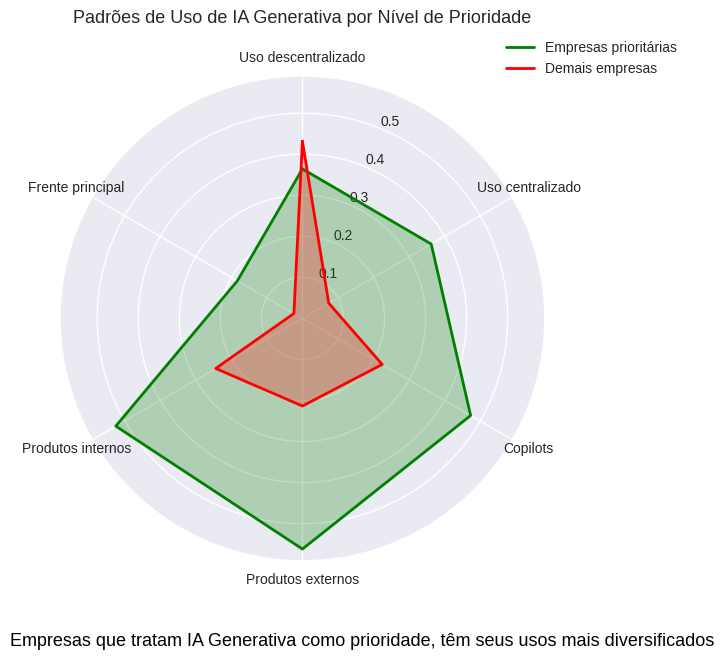

In [10]:
grupo_prioritario = df[df['ia_generativa_prioridade_empresa'].isin([
    "Sim, é nossa principal prioridade como empresa (com foco executivo significativo e alocação de orçamento relevante).",
    "Sim, está entre nossas principais prioridades para os próximos 2-4 anos (com discussões de iniciativas e orçamentos de curto a médio prazo)."
])]

grupo_nao_prioritario = df[~df['ia_generativa_prioridade_empresa'].isin([
    "Sim, é nossa principal prioridade como empresa (com foco executivo significativo e alocação de orçamento relevante).",
    "Sim, está entre nossas principais prioridades para os próximos 2-4 anos (com discussões de iniciativas e orçamentos de curto a médio prazo)."
])]

labels = [
    "Uso descentralizado",
    "Uso centralizado",
    "Copilots",
    "Produtos externos",
    "Produtos internos",
    "Frente principal"
]

# Médias de uso por grupo
uso_prioritario = grupo_prioritario[uso_cols].mean()
uso_nao_prioritario = grupo_nao_prioritario[uso_cols].mean()

# Chamada da função para o primeiro gráfico
criar_radar_chart(
    valores1=uso_prioritario,
    valores2=uso_nao_prioritario,
    categorias=labels,
    titulo="Padrões de Uso de IA Generativa por Nível de Prioridade",
    subtitulo="Empresas que tratam IA Generativa como prioridade, têm seus usos mais diversificados",
    label1="Empresas prioritárias",
    label2="Demais empresas",
    cor1="green",
    cor2="red"
)

## 3. Barreiras para adoção: o que está travando?

No gráfico abaixo, observamos como a falta de clareza nos casos de uso e a insuficiência de expertise/recursos são os maiores entraves para a adoção da IA generativa, citados por mais de 300 respondentes cada. Preocupações com segurança, privacidade e dados não prontos também são significativas, enquanto o suporte da alta direção é o menor obstáculo. Isso sugere que o desconhecimento e a falta de preparo técnico são os principais desafios, refletindo uma necessidade de educação e infraestrutura para avançar na integração da tecnologia.

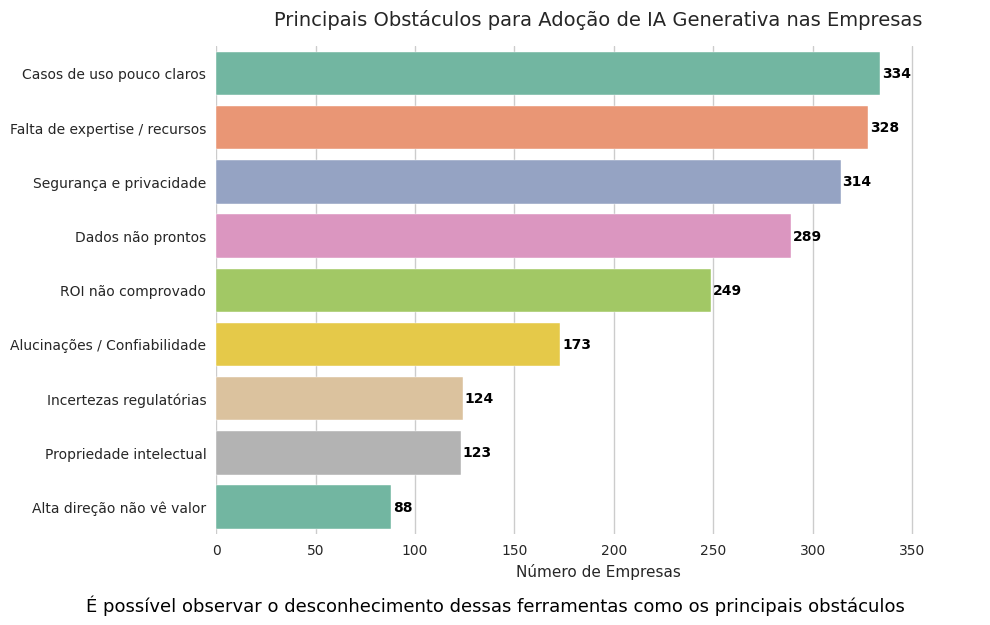

In [11]:
# Contagem absoluta
obstaculos_freq = df[obstaculos_cols].fillna(0).sum().sort_values(ascending=False)

# Aplica os novos rótulos ao índice
obstaculos_freq.index = obstaculos_freq.index.map(obstaculos_labels)

# Configuração do estilo
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
palette = sns.color_palette("Set2", len(obstaculos_freq))

# Plot
bars = sns.barplot(
    x=obstaculos_freq.values,
    y=obstaculos_freq.index,
    palette=palette
)

# Adiciona os valores no final de cada barra
for i, v in enumerate(obstaculos_freq.values):
    bars.text(v + 1, i, str(int(v)), color='black', va='center', fontweight='bold')

# Título mais explicativo
plt.title("Principais Obstáculos para Adoção de IA Generativa nas Empresas", fontsize=14, pad=15)

# Ajustes de eixos e layout
plt.xlabel("Número de Empresas")
plt.ylabel("")
plt.xlim(0, max(obstaculos_freq.values) * 1.15)  # espaço extra para os rótulos
plt.tight_layout()

plt.suptitle("É possível observar o desconhecimento dessas ferramentas como os principais obstáculos", fontsize=13, y=-0.00, color='black')

# Exibe
plt.show()

No gráfico abaixo, observamos que empresas que veem a IA generativa como prioridade enfrentam dificuldades inerentes à tecnologia, como alucinações/confiabilidade (28%), segurança e privacidade (23%), enquanto as que não a priorizam destacam mais casos de uso pouco claros (35%) e falta de expertise/recursos (34%). Isso sugere que o foco das empresas prioritárias está nas limitações técnicas da IA, enquanto as não prioritárias lidam mais com barreiras de compreensão e conformidade.

In [12]:
# Ver se mesmo entre empresas que priorizam, há alto índice de barreiras.

df_long = df.melt(
    id_vars='llm_prioridade_ajustado_2',
    value_vars=obstaculos_cols,  # sua lista com as 9 colunas dos obstáculos
    var_name='obstaculo',
    value_name='valor'
)

df_long_filtrado = df_long[df_long['valor'] == 1.0]
df_count = (
    df_long_filtrado
    .groupby(['obstaculo', 'llm_prioridade_ajustado_2'])
    .size()
    .reset_index(name='num_empresas')
)

totais_por_grupo = (
    df[['llm_prioridade_ajustado_2']]
    .value_counts()
    .reset_index()
    .rename(columns={0: 'total_grupo'})
)
df_prop = df_count.merge(
    totais_por_grupo,
    on='llm_prioridade_ajustado_2',
    how='left'
)

df_prop['proporcao'] = df_prop['num_empresas'] / df_prop['count']

df_prop.obstaculo = df_prop.obstaculo.map(obstaculos_labels)

fig = px.bar(
    df_prop,
    x='obstaculo',
    y='proporcao',
    orientation='v',
    color='llm_prioridade_ajustado_2',
    text=df_prop['proporcao'].apply(lambda x: f'{x:.0%}'),
    title='Proporção de Empresas que Reportam Obstáculos, por Prioridade de IA Generativa',
    color_discrete_map={
        'Empresa vê AI como Prioridade': '#2ca02c',
        'Empresa não vê AI como Prioridade': '#d62728'
    }
)

fig.update_layout(
    xaxis_title='Proporção de Empresas',
    yaxis_title='',
    legend_title='Prioridade de IA Gen',
    barmode='group', 
    height=600
)
fig.update_traces(textposition='inside')
fig.show()

O gráfico compara as principais barreiras ao uso de IA Generativa nas empresas entre 2023 e 2024, com base na porcentagem de organizações que citaram cada obstáculo. Entre os destaques, observa-se uma queda na “falta de compreensão”, que continua sendo a barreira mais citada, mas indica avanços na familiaridade com a tecnologia. Por outro lado, a barreira que mais cresceu foi “ROI não comprovado”, sinalizando que, à medida que a adoção amadurece, aumenta a pressão por resultados concretos, o que pode indicar que, embora a IA esteja sendo implementada com mais frequência, muitas organizações ainda enfrentam dificuldades para usá-la de forma estratégica ou integrada aos seus processos-chave, comprometendo o retorno esperado. 

Como conclusão, os dados revelam uma transição das barreiras iniciais — relacionadas à compreensão e aceitação — para desafios mais estruturais e operacionais, indicando que as empresas precisam agora focar em mensuração de impacto, confiabilidade das soluções e desenvolvimento de competências internas para escalar o uso da IA Generativa de forma sustentável.

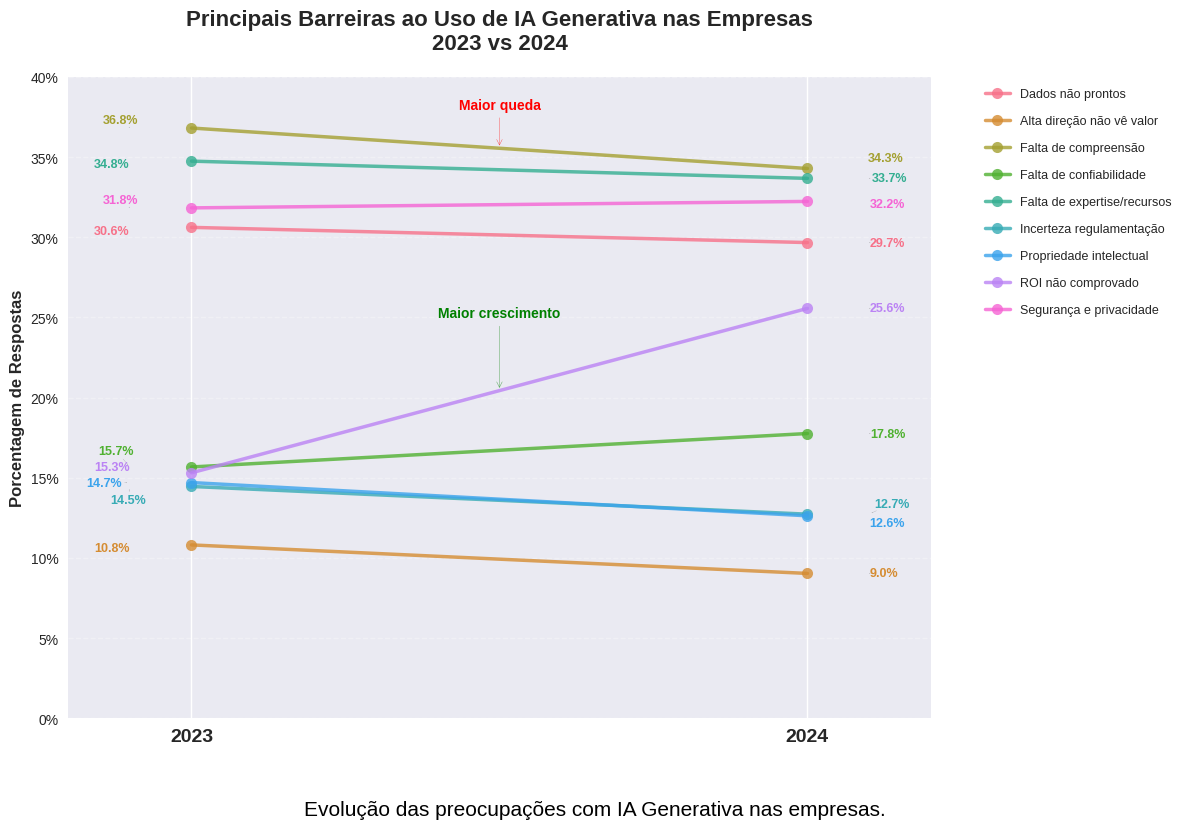

In [13]:
df_barreiras_all = data_completo.copy()

resultados = []
for col in colunas_barreiras:
    for ano in ['2023', '2024']:
        subset = df_barreiras_all[df_barreiras_all['ano_base'] == ano]
        total_validos = subset[col].notna().sum()
        total_um = (subset[col] == 1).sum()
        proporcao = total_um / total_validos if total_validos > 0 else 0
        resultados.append({'obstaculo': col, 'ano_base': ano, 'proporcao': proporcao})

df_obstaculos_pct = pd.DataFrame(resultados)
df_obstaculos_pivot = df_obstaculos_pct.pivot(index='obstaculo', columns='ano_base', values='proporcao').reset_index()

mapa_motivos_nao_usar_ia = {
    'ia_motivo_nao_usar_falta_compreensao': 'Falta de compreensão',
    'ia_motivo_nao_usar_falta_confiabilidade': 'Falta de confiabilidade',
    'ia_motivo_nao_usar_incerteza_regulamentacao': 'Incerteza regulamentação',
    'ia_motivo_nao_usar_seguranca_privacidade': 'Segurança e privacidade',
    'ia_motivo_nao_usar_roi_nao_comprovado': 'ROI não comprovado',
    'ia_motivo_nao_usar_dados_nao_prontos': 'Dados não prontos',
    'ia_motivo_nao_usar_falta_expertise_recursos': 'Falta de expertise/recursos',
    'ia_motivo_nao_usar_diretoria_nao_ve_valor': 'Alta direção não vê valor',
    'ia_motivo_nao_usar_propriedade_intelectual': 'Propriedade intelectual'
}


df_obstaculos_pivot.obstaculo = df_obstaculos_pivot.obstaculo.map(mapa_motivos_nao_usar_ia)

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
fig, ax = plt.subplots(figsize=(12, 8))
colors = sns.color_palette("husl", len(df_obstaculos_pivot))

texts = []

for i, row in df_obstaculos_pivot.iterrows():
    ax.plot([0, 1], [row['2023'], row['2024']], 
            marker='o', markersize=8, linewidth=2.5, 
            color=colors[i], alpha=0.8, label=row['obstaculo'])

    texts.append(ax.text(-0.1, row['2023'], f'{row["2023"]*100:.1f}%', 
                         ha='right', va='center', fontsize=9, color=colors[i], fontweight='bold'))

    texts.append(ax.text(1.1, row['2024'], f'{row["2024"]*100:.1f}%', 
                         ha='left', va='center', fontsize=9, color=colors[i], fontweight='bold'))

ax.set_xlim(-0.2, 1.2)
ax.set_ylim(0, 0.4)
ax.set_xticks([0, 1])
ax.set_xticklabels(['2023', '2024'], fontsize=14, fontweight='bold')
ax.set_yticks(np.arange(0, 0.45, 0.05))
ax.set_yticklabels([f'{int(y*100)}%' for y in np.arange(0, 0.45, 0.05)])
ax.grid(True, axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

ax.set_title('Principais Barreiras ao Uso de IA Generativa nas Empresas\n2023 vs 2024', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_ylabel('Porcentagem de Respostas', fontsize=12, fontweight='bold')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9, labelspacing=1.2)

df_obstaculos_pivot['dif'] = df_obstaculos_pivot['2024'] - df_obstaculos_pivot['2023']
idx_maior_alta = df_obstaculos_pivot['dif'].idxmax()
idx_maior_queda = df_obstaculos_pivot['dif'].idxmin()

ax.annotate('Maior crescimento', 
            xy=(0.5, (df_obstaculos_pivot.loc[idx_maior_alta, ['2023','2024']].mean())), 
            xytext=(0.5, 0.25),
            arrowprops=dict(arrowstyle='->', color='green', alpha=0.7),
            fontsize=10, ha='center', color='green', fontweight='bold')

ax.annotate('Maior queda', 
            xy=(0.5, (df_obstaculos_pivot.loc[idx_maior_queda, ['2023','2024']].mean())), 
            xytext=(0.5, 0.38),
            arrowprops=dict(arrowstyle='->', color='red', alpha=0.7),
            fontsize=10, ha='center', color='red', fontweight='bold')

plt.suptitle("Evolução das preocupações com IA Generativa nas empresas.", 
             fontsize=15, y=-0.05, color='black')

plt.tight_layout()

# Ajustar textos automaticamente
adjust_text(texts, only_move={'points': 'y', 'texts': 'y'}, 
            arrowprops=dict(arrowstyle="->", color='gray', alpha=0.5))

plt.show()

## 4. Discurso da empresa vs prática dos colaboradores

Ao compararmos a visão do uso de gestores com colaboradores, percebemos uma grande desconexão, na qual colaboradores afirmam um uso muito mais descentralizado dentro da empresa, enquanto a visão dos gestores é de um uso mais centralizado e difundido em seus produtos internos e externos. Isso pode indicar problemas de comunicação, adoção real ou maturidade operacional.

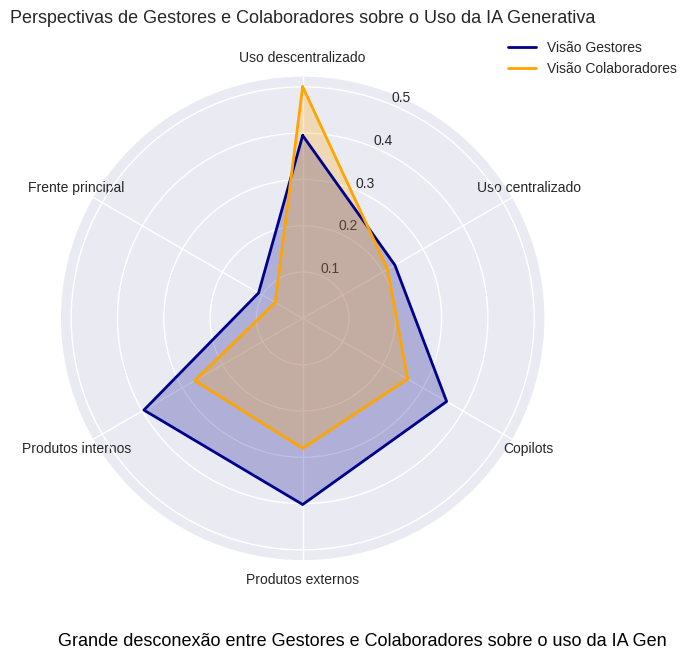

In [14]:
# Médias de uso por grupo
visao_gestor = df[uso_cols].mean()
visao_colab = df[uso_cols_func].mean()

criar_radar_chart(
    valores1=visao_gestor,
    valores2=visao_colab,
    categorias=labels,
    titulo="Perspectivas de Gestores e Colaboradores sobre o Uso da IA Generativa",
    subtitulo="Grande desconexão entre Gestores e Colaboradores sobre o uso da IA Gen",
    label1="Visão Gestores",
    label2="Visão Colaboradores",
    cor1="darkblue",
    cor2="orange"
)

## 5. IA Generativa está relacionada à satisfação ou remuneração profissional?

Observa-se uma ampla adoção da IA Generativa entre os profissionais de dados — menos de 7% afirmam não utilizar nenhuma solução com foco em produtividade. O gráfico revela uma tendência consistente: quanto mais estruturado e apoiado é o uso da IA pelas empresas, maior é o nível de satisfação dos profissionais. Isso reforça que, para promover bem-estar e produtividade, as organizações devem não apenas permitir o uso dessas ferramentas, mas investir ativamente em acesso seguro, capacitação e infraestrutura adequada.

Por outro lado, o gráfico também traz um ponto de atenção importante: mais da metade dos usuários recorrem a soluções gratuitas, que frequentemente utilizam os dados fornecidos para aprimorar seus modelos. Esse comportamento pode representar um risco significativo de exposição de informações sensíveis ou confidenciais das empresas, evidenciando a necessidade de políticas claras de governança e uso responsável da IA.

In [15]:
ordem_uso = list(uso_ai_labels.values())
col_uso_ai = list(uso_ai_labels.keys())
# Derrete os dados
df_melt = df.melt(
    id_vars='satisfacao_empresa_atual',
    value_vars=col_uso_ai,
    var_name='forma_bruta',
    value_name='Marcado'
)

# Mantém apenas os marcados
df_melt = df_melt[df_melt['Marcado'] == 1].copy()
df_melt['Forma de uso de IA'] = df_melt['forma_bruta'].map(uso_ai_labels)

# Agrupa total de pessoas por forma de uso (sem separar satisfação)
df_total = df_melt.groupby('Forma de uso de IA').size().reset_index(name='count')
df_total['Forma de uso de IA'] = pd.Categorical(df_total['Forma de uso de IA'], categories=ordem_uso, ordered=True)

# Proporção de satisfeitos por forma de uso
df_satisfeitos = df_melt[df_melt['satisfacao_empresa_atual'] == True]
df_satisfeitos = df_satisfeitos.groupby('Forma de uso de IA').size().reset_index(name='satisfeitos')
df_satisfeitos['Forma de uso de IA'] = pd.Categorical(df_satisfeitos['Forma de uso de IA'], categories=ordem_uso, ordered=True)

# Junta e calcula proporção + y escalado
df_merged = df_total.merge(df_satisfeitos, on='Forma de uso de IA', how='left')
df_merged['satisfeitos'] = df_merged['satisfeitos'].fillna(0)
df_merged['proporcao'] = df_merged['satisfeitos'] / df_merged['count']
df_merged['y_escalado'] = df_merged['proporcao'] * df_merged['count'].max()
df_merged['Forma de uso de IA'] = pd.Categorical(df_merged['Forma de uso de IA'], categories=ordem_uso, ordered=True)
df_merged = df_merged.sort_values('Forma de uso de IA')

# Gráfico de barras (total por forma de uso)
fig = px.bar(
    df_merged,
    x='Forma de uso de IA',
    y='count',
    text='count',
    category_orders={'Forma de uso de IA': ordem_uso},
    labels={
        'count': 'Número de pessoas',
        'Forma de uso de IA': 'Forma de uso de IA',
    },
    title='Satisfação no trabalho vs uso de IA Generativa com foco em produtividade'
)

# Linha de tendência (satisfeitos)
fig.add_trace(go.Scatter(
    x=df_merged['Forma de uso de IA'],
    y=df_merged['y_escalado'],
    mode='lines+markers+text',
    name='Tendência de satisfeitos',
    text=[f"{p:.0%}" for p in df_merged['proporcao']],
    textposition='top center',
    line=dict(color='black', width=2, dash='dot')
))

# Layout final
fig.update_layout(
    yaxis_tickformat=',',
    xaxis_tickangle=-20
)

fig.show()


Há uma forte correlação entre renda e acesso qualificado à IA Generativa. Profissionais com maior salário tendem a ter mais apoio institucional ou recursos próprios para investir em soluções pagas, enquanto os de faixas mais baixas dependem quase exclusivamente de ferramentas gratuitas. Isso evidencia desigualdades no acesso a tecnologias que potencializam produtividade no mercado de trabalho.

In [16]:
# Por faixa salarial
plot_uso_ia_por_grupo(
    df,
    grupo='faixa_salarial',
    col_uso_ai=col_uso_ai,
    titulo='Distribuição do uso de IA Generativa por Faixa Salarial',
    rotulo_eixo_x='Faixa Salarial',
    legenda_labels = uso_ai_labels
)

A análise deste gráfico leva a uma conclusão semelhante à anterior. A proporção de uso de IA gratuita diminui com o aumento da senioridade, enquanto o uso de IA paga e financiada pela empresa cresce, refletindo maior acesso a recursos à medida que a experiência aumenta.  
No geral, sêniores lideram em uso de IA paga e corporativa, sugerindo que cargos mais altos priorizam ferramentas premium para produtividade ou qualidade. Essa preferência pode estar correlacionada com salários mais elevados, reduzindo o impacto financeiro dos custos dessas ferramentas.

In [17]:
# Por senioridade
plot_uso_ia_por_grupo(
    df,
    grupo='nivel_senioridade',
    col_uso_ai=col_uso_ai,
    titulo='Uso de IA Generativa por Senioridade (proporção)',
    rotulo_eixo_x='Senioridade',
    legenda_labels = uso_ai_labels
)

Quanto olhamos passamos para uma visão por cargo, vemos a grande prefência de uso de soluções pagas para o perfil do cientista de dados. Possivelmente, isso pode estar relacionado com as tarefas desempenhadas: exploração de dados, formulação de hipóteses, modelagem preditiva e storytelling, tarefas em que modelos de linguagem ajudam muito.

In [18]:
# Por cargo
plot_uso_ia_por_grupo(
    df,
    grupo='cargo',
    col_uso_ai=col_uso_ai,
    titulo='Uso de IA Generativa por Cargo (proporção)',
    rotulo_eixo_x='Cargo',
    legenda_labels = uso_ai_labels
)

## 6. O uso da IA está alterando o dia a dia de trabalho dos profissionais de dados?
O uso da IA está alterando com que os profissionais gastam mais tempo?

O papel do engenheiro de dados continua altamente técnico, com foco dominante no desenvolvimento de pipelines, seguido por atividades estruturais como SQL, modelagem de arquitetura e DW/DM. Observa-se uma queda no foco em ETL tradicional, possivelmente pelo auxílio das LLMs para geração de código.

In [19]:
# Atividades Engenheiro de Dados
plot_tempo_atividades_por_ano(data_completo, colunas_de, nomes_de, 
                              'Em quais atividades o Engenheiro de Dados gasta mais tempo ao longo dos anos')

O Analista de Dados ainda concentra a maior parte de seu tempo em atividades de visualização e consulta de dados estruturados, com SQL e dashboards como pilares centrais da atuação. Há uma leve redução no uso de linguagens como Python/R, e ferramentas estatísticas continuam subutilizadas. A pouca presença de atividades como ETL, APIs e modelagem reforça o papel do analista como tradutor de dados em insights operacionais, e menos como desenvolvedor técnico de infraestrutura de dados.  

Entretanto, também não vemos um impacto tão direto do advento da IA Generativa, com uma grande estabilidade ao longo dos anos.

In [20]:
# Atividades Analista de Dados
plot_tempo_atividades_por_ano(data_completo, colunas_da, nomes_da, 
                              'Em quais atividades o Analista de Dados gasta mais tempo ao longo dos anos')

Apesar da glamourização do "modelo preditivo", o trabalho do cientista de dados ainda é predominantemente voltado à coleta e limpeza de dados, análises pontuais e à tradução de problemas de negócio. Atividades mais sofisticadas como MLOps e estatística avançada permanecem com baixa representação no cotidiano, indicando que a maturidade em produção ainda está em desenvolvimento em muitas empresas.

Por outro lado, grandes mudanças começam a surgir com o avanço das LLMs (Modelos de Linguagem de Grande Escala). Já é possível observar um aumento significativo no tempo dedicado ao treinamento e aplicação de LLMs, que hoje representa 7,6% das tarefas mais intensivas em tempo. Além disso, essas ferramentas têm potencial para reduzir o esforço em atividades tradicionalmente custosas, como a coleta e limpeza de dados, podendo transformar profundamente essa etapa do fluxo de trabalho (reduzindo de 38% em 2021 para 24,7% em 2024).  

Outro movimento relevante é a queda no tempo gasto com o contato com a área de negócio. Essa diminuição é preocupante, podendo indicar tanto uma melhor conhecimento das áreas de negócio sobre analytics, melhorando a comunicação e reduzindo o tempo gasto, quanto um maior afastamento dos cientistas com o negócio, o que prejudica o entendimento do problema, podendo gerar soluções técnicas desalinhadas com a realidade.

Obs.: A opção "Estudos Ad Hoc" não estava disponível na pesquisa de 2021

In [21]:
# Atividades Cientista de Dados
plot_tempo_atividades_por_ano(data_completo, colunas_ds, nomes_ds, 
                              'Em quais atividades o Cientista de Dados gasta mais tempo ao longo dos anos')

## 7. O uso de IA está diminuindo a oportunidade de trabalho de profissionais juniores?

O gráfico evidencia uma mudança estrutural na composição da força de trabalho em dados, com redução no número de juniores e aumento expressivo de sêniors, especialmente entre 2022 e 2024. Essa transição está intimamente ligada à popularização da IA Generativa, que impôs novas exigências técnicas e estratégicas, tornando essencial a presença de profissionais mais experientes para explorar e operacionalizar o potencial dessas ferramentas com eficácia e segurança.  
No entanto, essa tendência também levanta um sinal de alerta: com a queda na entrada de profissionais juniores, corre-se o risco de comprometer a formação da próxima geração de sêniores. Sem um fluxo contínuo de novos talentos sendo desenvolvidos, o mercado pode enfrentar um futuro com escassez de especialistas qualificados, o que pode frear a evolução sustentável do ecossistema de dados e IA.

In [22]:
prop_senior = data_completo.groupby('ano_base')['nivel_senioridade'].value_counts(normalize = True).reset_index()

ordem_niveis = ['Júnior', 'Pleno', 'Sênior']
prop_senior['nivel_senioridade'] = pd.Categorical(prop_senior['nivel_senioridade'], categories=ordem_niveis, ordered=True)

prop_senior['percentual'] = (prop_senior['proportion'] * 100).round(0)
# Gráfico de barras empilhadas
fig = px.bar(
    prop_senior,
    x='ano_base',
    y='percentual',
    color='nivel_senioridade',
    text='percentual',
    title='Distribuição de Nível de Senioridade por Ano',
    labels={'percentual': 'Proporção', 'ano_base': 'Ano', 'nivel_senioridade': 'Nível'},
    category_orders={'nivel_senioridade': ordem_niveis}
)

fig.update_traces(texttemplate='%{text:.0f}%', textposition='inside')


fig.update_layout(barmode='stack')
fig.show()

# Conclusões
### Adoção como Prioridade Estratégica

- Mais de metade dos gestores (53,6%) classificam a IA Generativa como principal prioridade ou entre as prioridades para os próximos anos, e essa percepção praticamente dobrou em um ano (de 12,3% para 22,5%). Isso demonstra que não se trata apenas de “moda”, mas de um movimento consistente de planejamento de curto/médio prazo.

- Ao mesmo tempo, 14,8% ainda não veem a tecnologia como foco — o que indica que, embora o “hype” seja forte, há segmentos que permanecem céticos ou aguardam resultados concretos.

### Estruturação vs. Descentralização no Uso

- Empresas que priorizam a IA Generativa apresentam padrões de uso maduros e diversificados (produtos internos, externos e copilots corporativos), ao passo que as demais concentram-se principalmente em uso descentralizado por indivíduos, sem governança ou integração nos processos centrais.

- Essa descentralização, quando não acompanhada de infraestrutura e treinamento adequados, pode gerar riscos de segurança e dificultar a mensuração de impacto.

### Evolução das Barreiras

- As barreiras iniciais (falta de compreensão e definição clara de casos de uso) vêm dando lugar a obstáculos mais estruturais, como ROI não comprovado, confiabilidade (alucinações) e privacidade.

- Empresas que já priorizam a IA focam nos desafios técnicos, enquanto as que não priorizam seguem lidando com a incerteza sobre como usar a tecnologia — reforçando a necessidade de capacitação e métricas de sucesso.

### Desconexão entre Discurso e Prática

- Há um gap perceptível entre o que gestores relatam (uso centralizado, integrado a produtos) e o que colaboradores vivenciam (uso informal e descentralizado). Isso pode indicar falhas de comunicação ou maturidade operacional insuficiente.

### Impacto no Mercado de Trabalho

- A adoção estruturada de IA Generativa está positivamente correlacionada com satisfação e remuneração: profissionais com maior salário e senioridade têm mais acesso a ferramentas pagas e suporte institucional.

- Por outro lado, o uso massivo de soluções gratuitas por grande parte dos colaboradores traz riscos de exposição de dados sensíveis das empresas.

- Observa-se uma redução contínua no ingresso de perfis juniores (queda de 2022 a 2024) e aumento de perfis sêniors, o que levanta o alerta sobre a formação da próxima geração de especialistas.

### Mudanças nas Atividades Cotidianas

- Profissionais de dados continuam focados majoritariamente em atividades tradicionais, como desenvolvimento de pipelines, consultas em SQL e limpeza de dados, porém já se observa um crescimento significativo no uso de modelos de linguagem avançados (LLMs) para automatizar tarefas como geração de código e manipulação de dados, que passaram a representar uma parcela relevante do tempo dedicado ao trabalho em 2024.

# Recomendações

## Para Gestores de empresas:

- Evite seguir a tendência apenas por modismo. Os dados mostram que nem todas as empresas priorizam IA de forma consistente. Avalie se há casos de uso concretos na sua realidade antes de investir.

- Faça diagnósticos internos de prontidão digital antes de alocar recursos. O uso produtivo de IA requer dados organizados, governança, e times preparados.

- Construa uma visão clara de impacto da IA. A percepção de que a IA é “a maior prioridade” cresceu, mas não está necessariamente ligada a resultados claros. Envolver áreas de negócio e TI para identificar problemas reais a serem resolvidos com IA.

- Incentive o uso individual, mas com diretrizes claras. Muitas pessoas estão usando IA de forma gratuita e independente. Isso mostra iniciativa, mas também risco. **Criar políticas internas de uso responsável é urgente**.

**Referências:**  
https://mittechreview.com.br/adocao-da-ia-transformacao-cultural-e-estrategica-nas-empresas/  
https://techpulsion.com/pt/ai-readiness-for-businesses/  
https://fastcompanybrasil.com/worklife/quase-metade-dos-trabalhadores-admite-estar-usando-a-ia-do-jeito-errado/  

## Para Profissionais da área de dados (principalmente Juniors):

- Reconheça que a fase atual é transitória. Mesmo com muitas funções sendo automizadas pela IA, as empresas necessitam de profissionais que possam operar com IA com entendimento crítico da tecnologia.
  
- Foque no aprendizado ativo de IA. Estude sobre Prompt Engineering, controle de qualidade dos outputs e uso de agentes IA.

- Construa experiência prática com projetos reais. Mostre que sabe aplicar IA ou dados em problemas do mundo real, mesmo que pessoais ou voluntários.

- Aposte em empresas que investem em treinamento. Priorize lugares com mentoria, programas de entrada e cultura de aprendizado.


**Referências:**  
https://www.deeplearning.ai/short-courses/chatgpt-prompt-engineering-for-developers/  
https://docs.langchain.com/langgraph-platform  
https://wawiwa-tech.com/blog/trending/the-junior-tech-talent-crisis-is-ai-replacing-jobs-and-what-can-young-professionals-do/  

## Para o Data Hackers + Bain

- Nos últimos três anos, a adoção de modelos de linguagem (LLMs) cresceu de forma exponencial, e a maioria dos profissionais de tecnologia e dados já teve contato com pelo menos uma ferramenta baseada em IA generativa. No entanto, apenas medir se “usa ou não usa” já não captura a complexidade atual do fenômeno. Dessa forma, seria interessante incluir novas perguntas sobre IA Generativa na pesquisa desse ano para permitir que ela reflita o estágio atual da IA generativa no Brasil com mais precisão e utilidade prática. Possíveis perguntas podem ser:
  - Quais modelos de linguagem você utiliza? (ex: ChatGPT, Claude, Gemini, LLaMA, etc.) 
  - Para quais finalidades você usa IA Generativa? (ex: Geração de código, Análise de dados, Documentação, Brainstorm, Produtividade pessoal, Atendimento, etc.)
  - O quanto a IA está superando, atendendo ou ficando abaixo das expectativas criadas? (ex: Ficou muito abaixo do esperado, Ficou abaixo do esperado, Atingiu as metas estabelecidas, Superou as metas estabelecidas, Superou as metas com grande margem)